MockImage_1.json
MockImage_10.json
MockImage_11.json
MockImage_2.json
MockImage_3.json
MockImage_4.json
MockImage_5.json
MockImage_6.json
MockImage_7.json
MockImage_8.json
MockImage_9.json
MockImage_Cam_01_VirtualCamID_V0.json


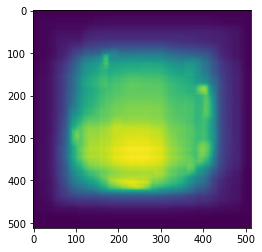

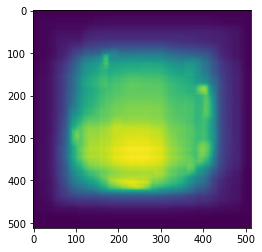

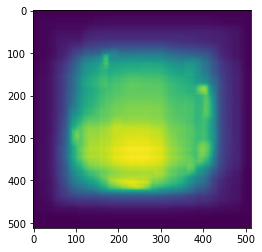

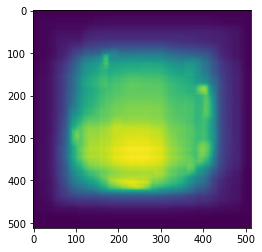

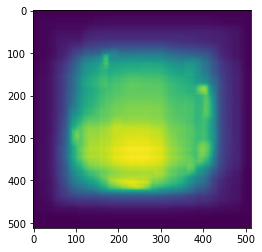

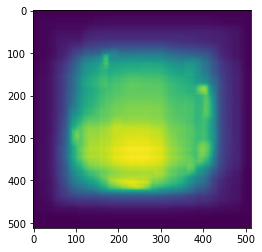

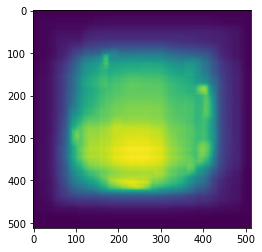

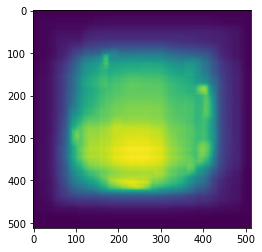

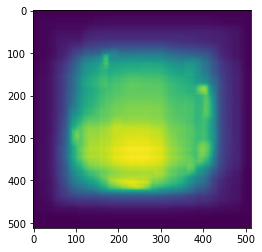

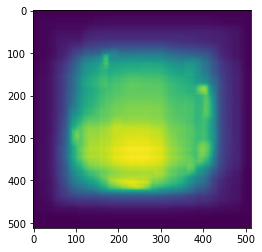

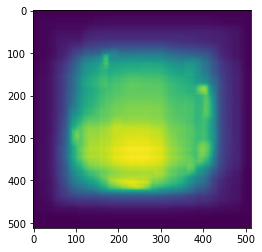

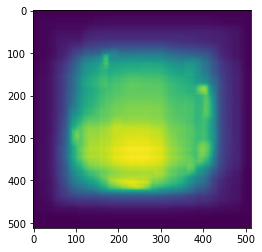

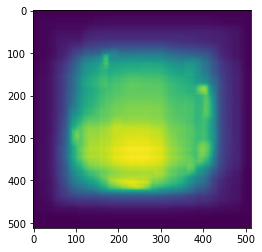

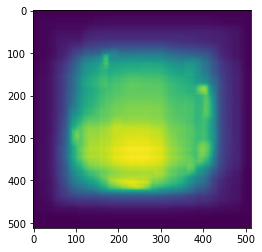

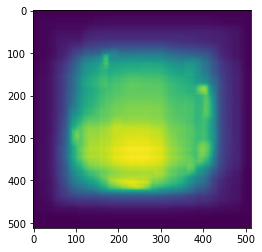

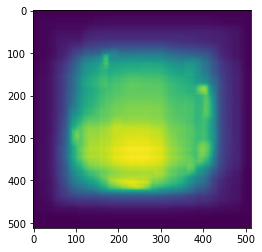

In [19]:
# Imports
import sys
sys.path.append("/jidoka/code/jt.prod.training/inference")
import inference_from_json

import glob
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


predictions_json_dir = "/jidoka/workspace/heatmap_generation/sample_data" #PATH_TO_REJCECTION_CAUSE_PREDS_DIR
heatmap_size = [512, 512]      # Height, width
num_classes = 15


# create a list of empty heatmaps, one for each class
classwise_heatmaps = [np.zeros(heatmap_size, np.int64)]*num_classes

# create an empty all-class heatmap
all_class_heatmap = np.zeros(heatmap_size, np.int64)

infer_model = inference_from_json.Infer_Single_Json(predictions_json_dir)
file_paths = glob.glob(os.path.join(predictions_json_dir, "*.json"))
for file_path in file_paths:
    json_dir, json_name = os.path.split(file_path)
    
    # run inference on the image and get the prediction dict
    prediction_dict = infer_model.run_inference_for_single_image(json_name)    
    detection_boxes = prediction_dict["detection_boxes"]
    detection_class = prediction_dict["detection_classes"]

    for c in range(len(detection_class)):
        for curr_class_id in range(num_classes):
            if(detection_class[c] == curr_class_id):

                # calculate bounding box coordinates in absolute coordinate system
                xmin = int((detection_boxes[c][1]*heatmap_size[1]))
                ymin = int((detection_boxes[c][0]*heatmap_size[0]))
                xmax = int((detection_boxes[c][3]*heatmap_size[1]))
                ymax = int((detection_boxes[c][2]*heatmap_size[0]))

                # update corresponding classwise heatmap
                classwise_heatmaps[curr_class_id][ymin:ymax, xmin:xmax] += 1
                
                # update all-class heatmap
                all_class_heatmap[ymin:ymax, xmin:xmax] += 1
            

# normalize all-class heatmap and plot
all_class_heatmap = all_class_heatmap / all_class_heatmap.max()
plt.imshow(all_class_heatmap)
plt.show()


# loop through classwise heatmaps, normalize and plot
for curr_class_heatmap in classwise_heatmaps:
    curr_class_heatmap = curr_class_heatmap / curr_class_heatmap.max()
    
    plt.imshow(curr_class_heatmap)
    plt.show()